## Training the model using cleaned_demographics.csv dataset with PCA applied on it and 2 features considered as principal component features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../Dataset with PCA/pca_demographics.csv')
df.head()

,PC1,PC2,Total Population
0,-0.445547,0.087516,4.0
1,16.537534,14.037633,1216624.0
2,-0.445567,0.087511,2.0
3,-0.282247,0.158660,6559.0
4,-0.381749,0.118858,2496.0


In [4]:
df.columns

Index(['PC1', 'PC2', 'Total Population'], dtype='object')

### Now we have a dataset with only numeric features. Now we split the features into independent and dependent features as x and y respectively. 

In [5]:
x=df.drop('Total Population', axis=1)
y=df['Total Population']

In [6]:
x.head()

,PC1,PC2
0,-0.445547,0.087516
1,16.537534,14.037633
2,-0.445567,0.087511
3,-0.282247,0.158660
4,-0.381749,0.118858


In [7]:
y.head()

0          4.0
1    1216624.0
2          2.0
3       6559.0
4       2496.0
Name: Total Population, dtype: float64

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [10]:
x_train.shape, x_test.shape

((12848, 2), (5507, 2))

In [11]:
x_train.columns

Index(['PC1', 'PC2'], dtype='object')

In [12]:
x_test.head()

,PC1,PC2
10209,-0.443773,0.089960
17345,-0.416959,0.076538
13461,-0.444537,0.090273
7018,-0.444475,0.090229
2475,-0.108035,0.293187


In [13]:
x_test.tail()

,PC1,PC2
2694,-0.435279,0.091856
11465,-0.444402,0.090247
3015,-0.445552,0.087517
17200,-0.433158,0.085496
7896,-0.442293,0.089626


In [14]:
y_test.head()

10209       29.0
17345      704.0
13461        2.0
7018         3.0
2475     13279.0
Name: Total Population, dtype: float64

In [15]:
y_test.tail()

2694     466.0
11465      8.0
3015       3.0
17200    266.0
7896      90.0
Name: Total Population, dtype: float64

### Doing the regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression=LinearRegression()

In [19]:
regression.fit(x_train,y_train)
y_predicted = regression.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
accuracy = r2_score(y_test, y_predicted)
mae=mean_absolute_error(y_test, y_predicted)
mse=mean_squared_error(y_test, y_predicted)
print(accuracy)
print(mae)
print(mse)

0.9413017345274667
3970.825989454951
1173770331.8014944


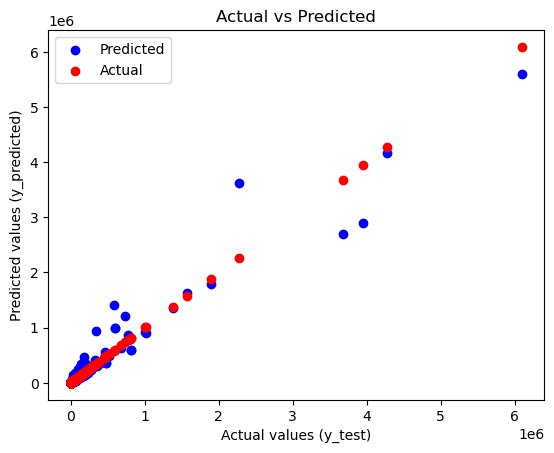

In [22]:
### plotting the actual y_test values and predicted y values using multiple linear regression

plt.scatter(y_test, y_predicted, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predicted)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [23]:
import pickle

In [25]:
with open('pca_demographics.pkl', 'wb') as file:
    pickle.dump(regression, file)

### Decission Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)

dt_mae=mean_absolute_error(y_test,dt_predictions)
dt_accuracy=r2_score(y_test,dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(dt_accuracy)
print(dt_mae)
print(dt_mse)


0.9524271610526108
1686.645723624478
951298756.5560197


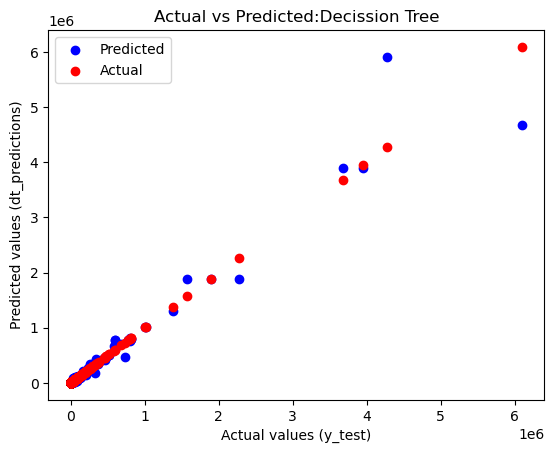

In [29]:
### plotting the actual y_test values and the predicted y values using decission tree regressor

plt.scatter(y_test, dt_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (dt_predictions)')
plt.title('Actual vs Predicted:Decission Tree')
plt.legend()
plt.show()


In [30]:
with open('pca_emographics_decission_tree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

### Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae= mean_absolute_error(y_test,rf_predictions)
rf_accuracy=r2_score(y_test,rf_predictions)
print(rf_accuracy)
print(rf_mae)
print(rf_mse)


0.9544491397472649
1537.522763755221
910865899.0565035


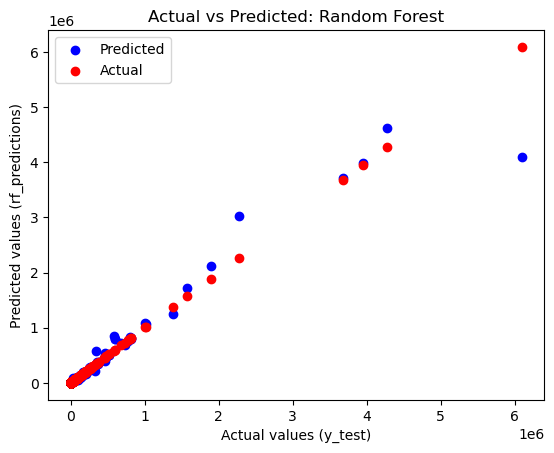

In [32]:
### plotting the actual y_test values and the predicted y_test values using random forest regressor

plt.scatter(y_test, rf_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (rf_predictions)')
plt.title('Actual vs Predicted: Random Forest')
plt.legend()
plt.show()


In [33]:
with open('pca_demographics_random_forest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### XGBoost Regression

In [34]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae=mean_absolute_error(y_test,xgb_predictions)
xgb_accuracy = r2_score(y_test,xgb_predictions)
print(xgb_accuracy)
print(xgb_mae)
print(xgb_mse)


0.6152386359341018
5293.730212416129
7693949221.98088


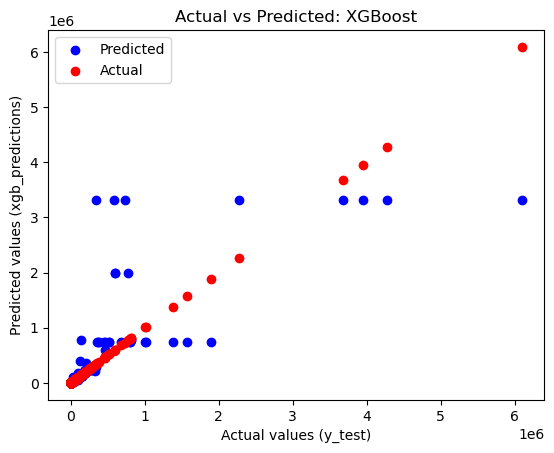

In [35]:
### plootting the actual y_test values and the predicted y_test values using xgboost regressor


plt.scatter(y_test, xgb_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (xgb_predictions)')
plt.title('Actual vs Predicted: XGBoost')
plt.legend()
plt.show()


In [36]:
with open('xgboost_demographics_xgboost.pkl', 'wb') as file:
    pickle.dump(rf_model, file)